<a href="https://colab.research.google.com/github/CodeGreatCommander/CourseOfStudy/blob/main/COS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2
from PyPDF2 import PdfReader
def get_courses(dept):
  def extract_pages(text):
    t=[]
    with open("cos.pdf","rb") as pd:
      pdf = PdfReader(pd)
      for page_num in range(len(pdf.pages)):
        page=pdf.pages[page_num].extract_text()
        f=True
        for i in text:
          if i not in page:
            f=False
            break
        if(f):t.append(page)
    return t
  text=extract_pages([dept,"Institute Core"])
  tC=[": Basic Sciences","Institute Core: Engineering Arts and Sciences","Programme-Linked Basic","Departmental Core"]
  print(text)
  text_1=text[0].split("\n")
  f=False
  last=""
  map={}
  def check(s,x):
    f=False
    for a in s:
      if(a in x):
        return a
    return False
  for x in text_1:
    if(" Total Credits" in x):
      f=False
    if(f and x[0]!=" "):
      map[last].append(x[:6])
    p=check(tC,x)
    if(p!=False):
      f=True
      last=p
      map[p]=[]
  return map

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.3 MB/s eta 0:00:00


In [4]:
departments=["MT1","MT6","CS1","CS5","EE1","PH1","CE1"]
loc={}
for x in departments:
  loc[x]=get_courses(x)

['71The overall Credit Structure\nCourse Category Credits\nInstitute Core Courses\n Basic Sciences (BS)  24\n Engineering Arts and Science (EAS)  19\n Humanities and Social Sciences (HuSS)  15\nProgramme-linked Courses   12.5\nDepartmental Courses\n Departmental Core   63.5\n Departmental Electives  12\nOpen Category Courses  10\nTotal Graded Credit requirement  156\nNon Graded Units  11\nInstitute Core : Basic Sciences\nCML101 Introduction to Chemistry 3 1 0 4\nCMP100 Chemistry Laboratory 0 0 4 2\nMTL100 Calculus 3 1 0 4\nMTL101 Linear Algebra and Differential Equations 3 1 0 4\nPYL101 Electromagnetism & Quantum Mechanics   3 1 0 4\nPYP100 Physics Laboratory 0 0 4 2\nSBL100 Introductory Biology for Engineers 3 0 2 4\n Total Credits    24 \nInstitute Core: Engineering Arts and Sciences\nAPL100 Engineering Mechanics 3 1 0 4\nCOL100 Introduction to Computer Science 3 0 2 4\nCVL100 Environmental Science 2 0 0 2\nELL101 Introduction to Electrical Engineering 3 1 0 4\nELP101 Introduction to

In [5]:
def write_nested_dict_to_file(data, file, indent=0):
    for key, value in data.items():
        if isinstance(value, dict):
            # If the value is another dictionary, recursively write it
            file.write(' ' * indent + f'{key}:\n')
            write_nested_dict_to_file(value, file, indent + 4)
        else:
            # If the value is not a dictionary, write the key-value pair
            file.write(' ' * indent + f'{key}: {value}\n')

In [6]:
with open('output_loc.txt', 'w') as file:
    write_nested_dict_to_file(loc, file)

In [7]:
ls=set({})
for x in loc:
  for a in loc[x]:
    for q in loc[x][a]:
      ls.add(q)
print(ls)

{'PYL101', 'PYL102', 'MTP290', 'PYP222', 'PYL206', 'COL100', 'MTL106', 'COL226', 'MTL411', 'ELL311', 'MTL102', 'COD490', 'CVL243', 'ELL203', 'ELL304', 'PYL125', 'PYL121', 'CVP441', 'PYL208', 'MTL390', 'MCL142', 'CVP222', 'ELL101', 'ELP302', 'MTL107', 'SBL100', 'ELP101', 'PYL123', 'MTL101', 'COL333', 'PYP100', 'ELL302', 'MTL100', 'PYL202', 'MTL122', 'PYD411', 'APL107', 'MTL421', 'CVL245', 'MTL342', 'APL108', 'MTL104', 'CVL242', 'CVP261', 'ELP212', 'COL352', 'ELD411', 'CVL342', 'PYL103', 'ELL202', 'COL351', 'CMP100', 'MTL105', 'COP290', 'MTL103', 'PYL122', 'MTL782', 'CVL244', 'COL334', 'COL331', 'ELL212', 'CVL381', 'CVP243', 'PYL205', 'APL100', 'CML101', 'CVL341', 'ELL305', 'CVP321', 'MTD411', 'ELL303', 'CVP281', 'CVL261', 'COL362', 'CVD411', 'CML102', 'COD492', 'CVL222', 'MCP101', 'ELL205', 'MCP100', 'CVL282', 'PYP221', 'CVL100', 'CVL321', 'COL216', 'ELL211', 'PYL209', 'ELP225', 'ELL225', 'COL202', 'CVL141', 'PYP212', 'COL215', 'PYP111', 'ESL350', 'CVP342', 'CVL111', 'COL106', 'CVL212',

In [8]:
def get_pre_req(ls):
  mp={}
  for x in ls:mp[x]=""
  with open("cos.pdf","rb") as pd:
      pdf = PdfReader(pd)
      for page_num in range(len(pdf.pages)):
        page=pdf.pages[page_num].extract_text()
        page=page.split("\n")
        lis=[]
        for q in range(len(page)):
          if("Pre-requisite(s)" in page[q]):
            for a in ls:
              if(q>1 and a in page[q-2]):
                mp[a]=page[q]
  return mp;

In [9]:
pre_req=get_pre_req(ls)

In [10]:
print(pre_req)

{'PYL101': '', 'PYL102': 'Pre-requisite(s): PYL101 ', 'MTP290': 'Pre-requisite(s): MTL101', 'PYP222': 'Pre-requisite(s): PYL114', 'PYL206': 'Pre-requisite(s): PYL121', 'COL100': '', 'MTL106': '', 'COL226': 'Pre-requisite(s): COL106', 'MTL411': 'Pre-requisite(s): MTL104 and MTL122', 'ELL311': 'Pre-requisite(s): ELL205', 'MTL102': '', 'COD490': '', 'CVL243': 'Pre-requisite(s): CVL141', 'ELL203': 'Pre-requisite(s): ELL101', 'ELL304': 'Pre-requisite(s): ELL101, ELL202, ELL211, ELL231', 'PYL125': '', 'PYL121': '', 'CVP441': 'Pre-requisite(s): CVL243, CVL342', 'PYL208': '', 'MTL390': 'Pre-requisite(s): MTL106', 'MCL142': '', 'CVP222': 'Pre-requisite(s): CVL222 or concurrent with CVL222', 'ELL101': '', 'ELP302': 'Pre-requisite(s): ELL302', 'MTL107': '', 'SBL100': '', 'ELP101': '', 'PYL123': '', 'MTL101': '', 'COL333': 'Pre-requisite(s): COL106', 'PYP100': '', 'ELL302': 'Pre-requisite(s): ELL231 (EE3) / ELL211 (EE1)', 'MTL100': '', 'PYL202': 'Pre-requisite(s): PYL122', 'MTL122': 'Pre-requisite

In [11]:
cpre_req={}
for a in pre_req:
  b=pre_req[a]
  if(b==''):cpre_req[a]=[];continue
  b=b[17:]
  if(","in b):b=b.split(",")
  elif("or"in b):b=b.split("or")
  elif("and"in b):b=b.split("and")
  else: b=[b]
  for i in range(len(b)):
    b[i]=b[i].strip()
    if("concurrent with "in b[i].lower()):b[i]=b[i][len("concurrent with "):]
  cpre_req[a]=b
print(cpre_req)

{'PYL101': [], 'PYL102': ['PYL101'], 'MTP290': ['MTL101'], 'PYP222': ['PYL114'], 'PYL206': ['PYL121'], 'COL100': [], 'MTL106': [], 'COL226': ['COL106'], 'MTL411': ['MTL104', 'MTL122'], 'ELL311': ['ELL205'], 'MTL102': [], 'COD490': [], 'CVL243': ['CVL141'], 'ELL203': ['ELL101'], 'ELL304': ['ELL101', 'ELL202', 'ELL211', 'ELL231'], 'PYL125': [], 'PYL121': [], 'CVP441': ['CVL243', 'CVL342'], 'PYL208': [], 'MTL390': ['MTL106'], 'MCL142': [], 'CVP222': ['CVL222', 'CVL222'], 'ELL101': [], 'ELP302': ['ELL302'], 'MTL107': [], 'SBL100': [], 'ELP101': [], 'PYL123': [], 'MTL101': [], 'COL333': ['COL106'], 'PYP100': [], 'ELL302': ['ELL231 (EE3) / ELL211 (EE1)'], 'MTL100': [], 'PYL202': ['PYL122'], 'MTL122': ['MTL100'], 'PYD411': [], 'APL107': ['APL100'], 'MTL421': [], 'CVL245': ['EC35'], 'MTL342': ['MTL180'], 'APL108': ['APL100'], 'MTL104': ['MTL101'], 'CVL242': ['APL108'], 'CVP261': ['CVL261', 'CVL261'], 'ELP212': ['ELL212'], 'COL352': [], 'ELD411': [], 'CVL342': ['CVL242'], 'PYL103': [], 'ELL202'

In [12]:
print(loc["MT1"])

{'Departmental Core': ['ELL305', 'ELP305', 'MTL102', 'MTL103', 'MTL104', 'MTL105', 'MTL106', 'MTL107', 'MTL122', 'MTL180', 'MTP290', 'MTL342', 'MTL390', 'MTD411', 'MTL421', 'MTL445', 'MTL458', 'MTL782', 'MTL783'], ': Basic Sciences': ['CML101', 'CMP100', 'MTL100', 'MTL101', 'PYL101', 'PYP100', 'SBL100'], 'Institute Core: Engineering Arts and Sciences': ['APL100', 'COL100', 'CVL100', 'ELL101', 'ELP101', 'MCP100', 'MCP101'], 'Programme-Linked Basic': ['COL106', 'ELL201', 'PYL102']}


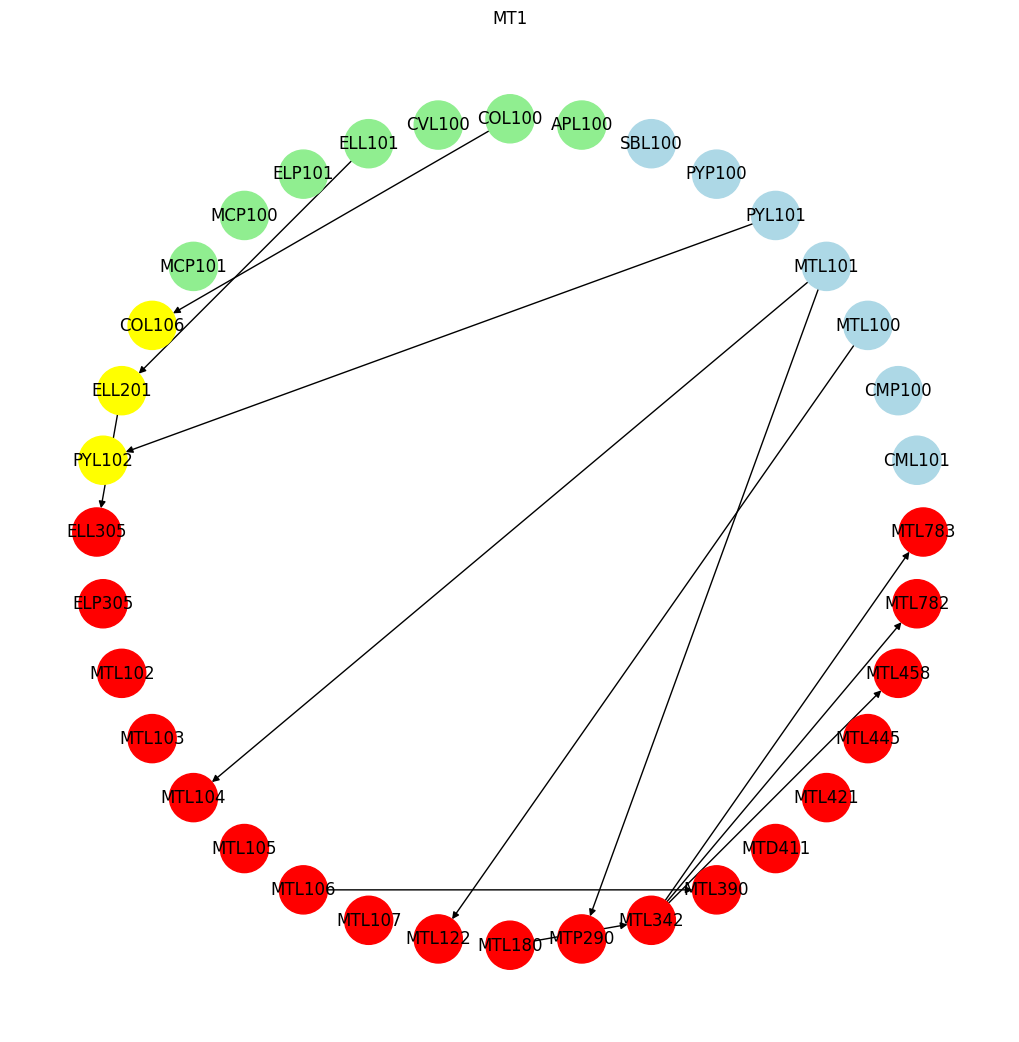

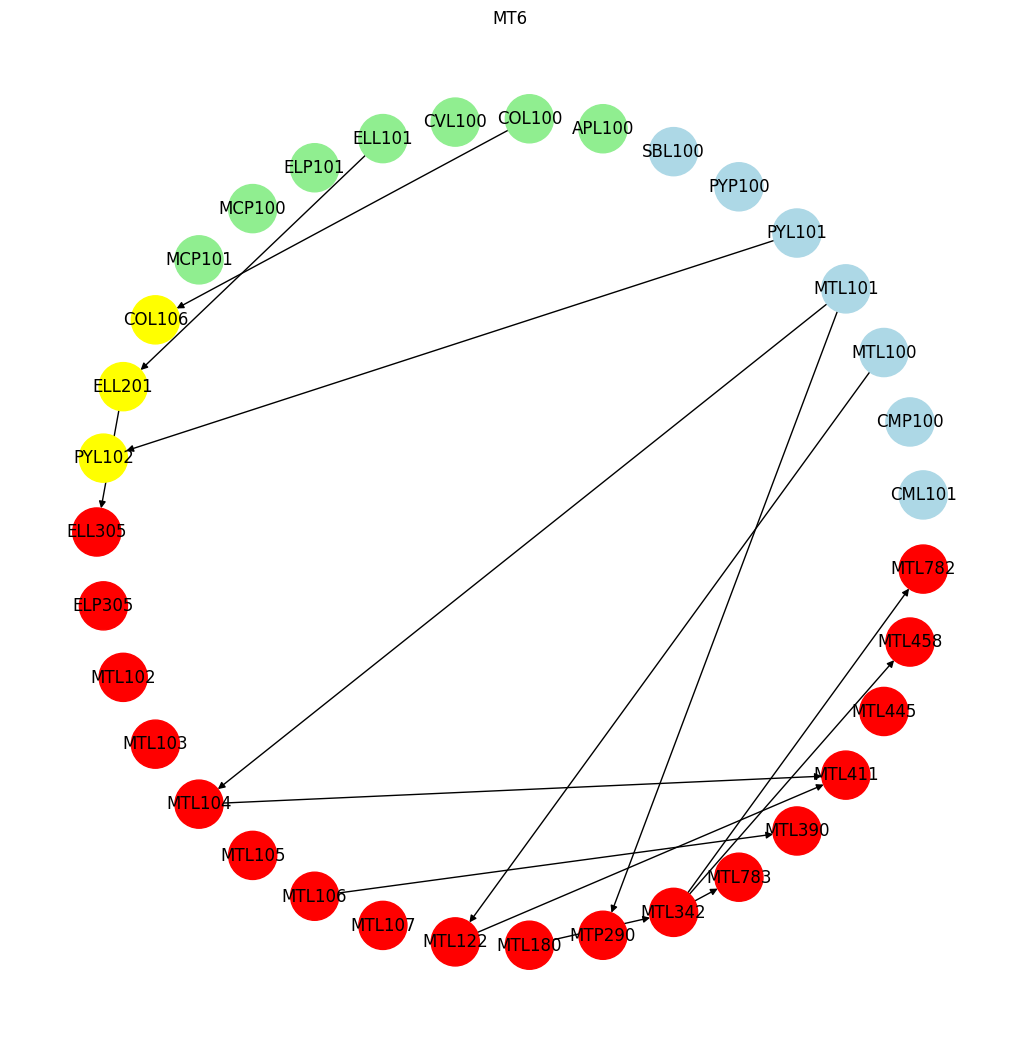

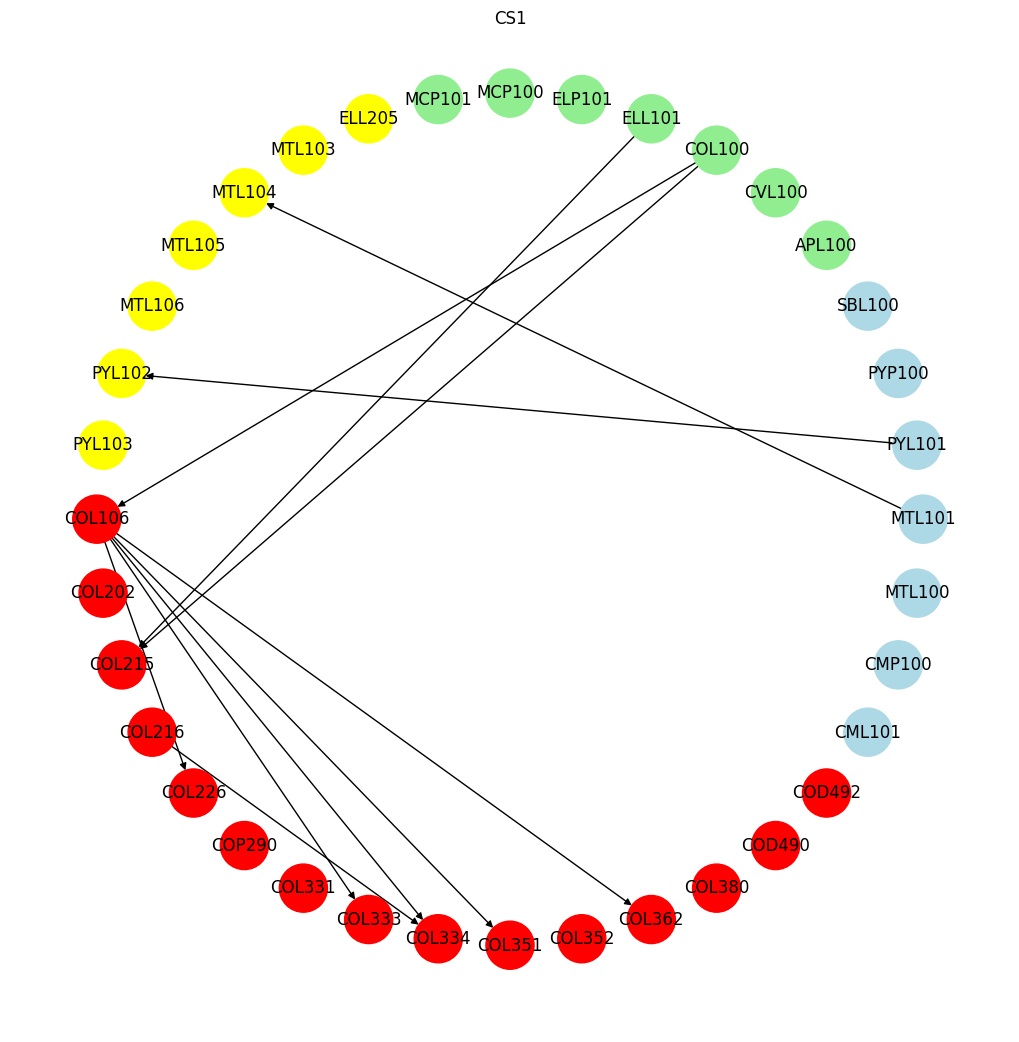

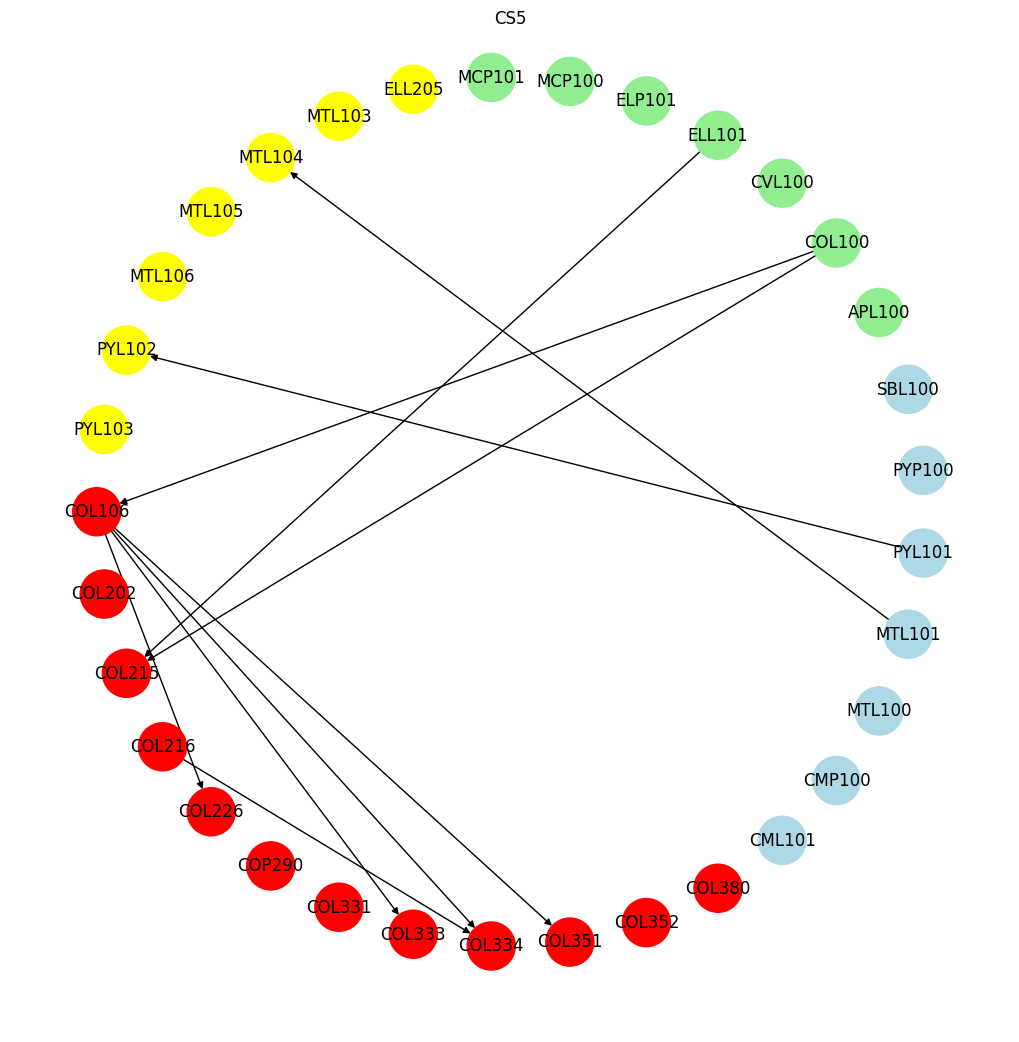

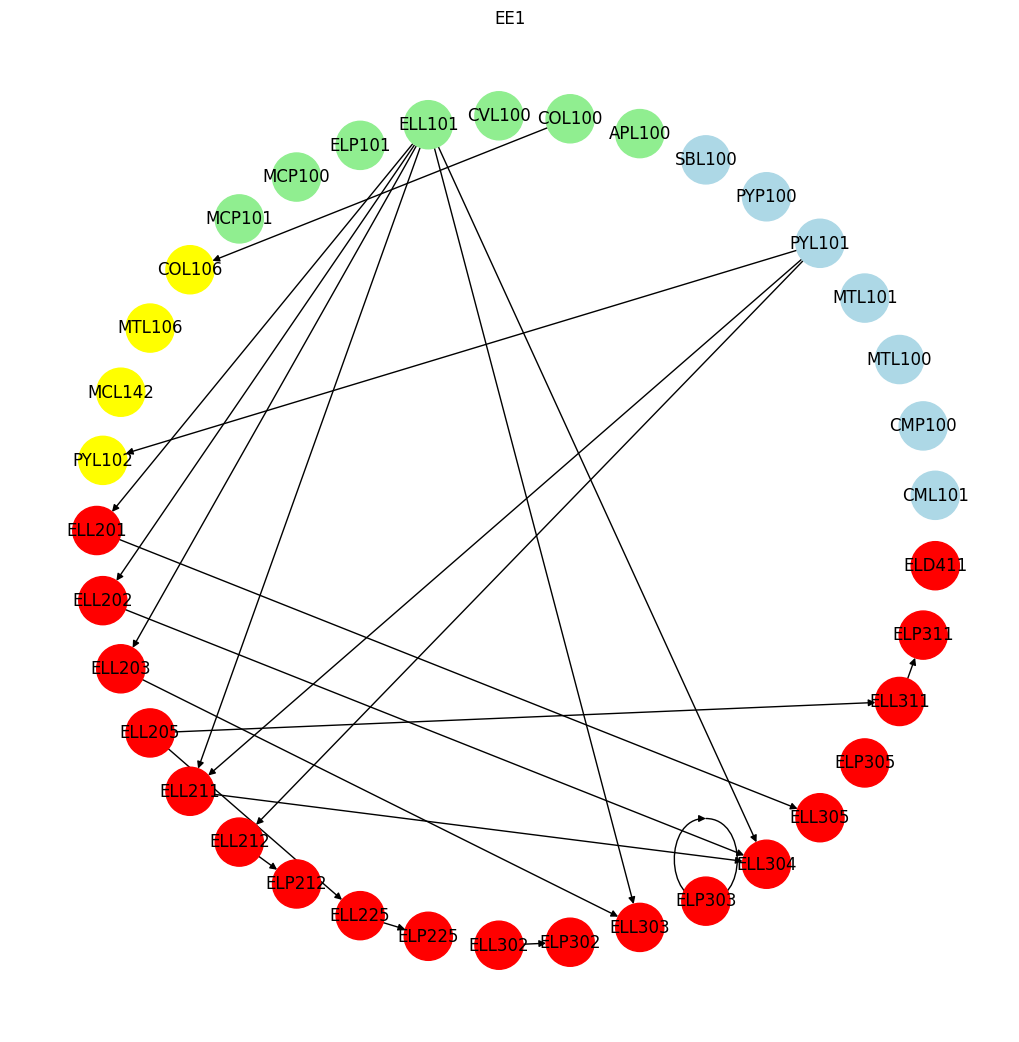

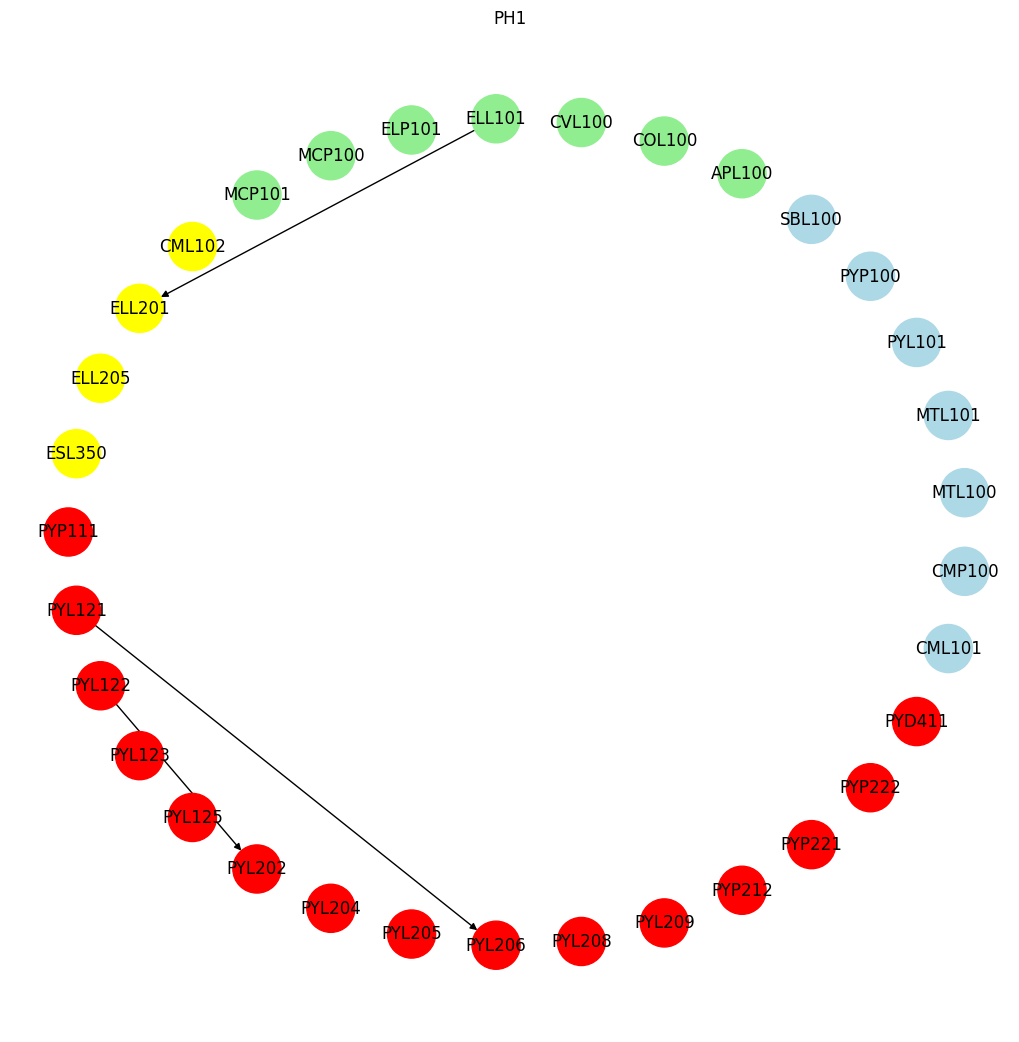

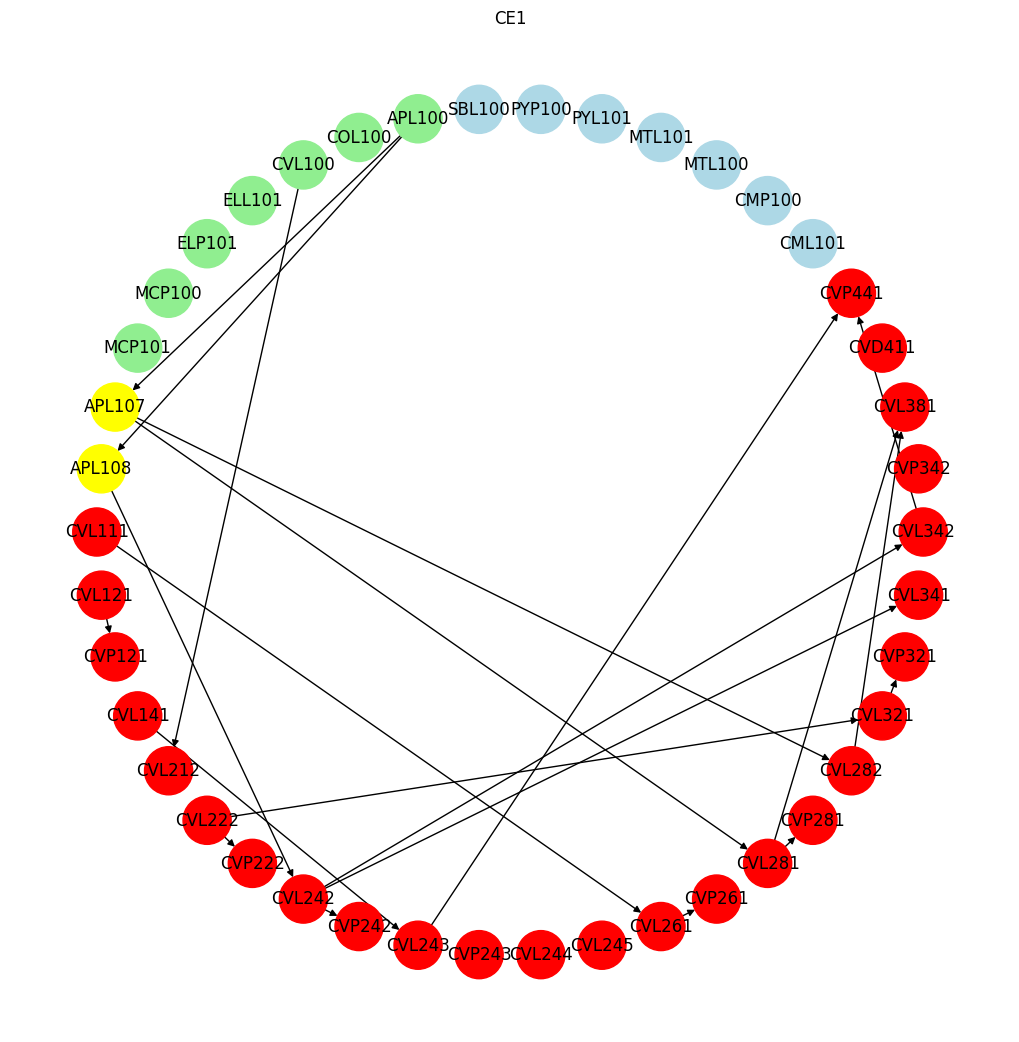

In [13]:
def combine(dep):
  colour={"Departmental Core":"red",": Basic Sciences":"lightblue","Institute Core: Engineering Arts and Sciences":"lightgreen","Programme-Linked Basic":"yellow"}
  ls=[]
  gcolour=[]
  for a in loc[dep]:
    ls+=loc[dep][a]
    for x in loc[dep][a]:
      gcolour.append(colour[a])
  return (ls,gcolour)
def get_edges(ls,dep):
  edges=[]
  for a in ls:
    for b in cpre_req[a]:
      if(b in ls):
        edges.append((b,a))
  return edges
import networkx as nx
import matplotlib.pyplot as plt
def print_graph(dep):
  G = nx.DiGraph()
  all_cour,colour=combine(dep)
  G.add_nodes_from(all_cour)
  edges=get_edges(all_cour,dep)
  G.add_edges_from(edges)
  pos = nx.shell_layout(G)
  plt.figure(figsize=(10, 10))
  nx.draw(G, pos, with_labels=True, node_color=colour, node_size=1200, font_size=12, arrows=True)
  plt.title(dep)
  plt.show()
for x in departments:
  print_graph(x)